In [3]:
pip install git+https://github.com/pathpy/pathpyG.git

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.

  Cloning https://github.com/pathpy/pathpyG.git to c:\users\jesse\appdata\local\temp\pip-req-build-i54ktt2m
  Resolved https://github.com/pathpy/pathpyG.git to commit db292cb2fbedd0b119d5046df5c25d807cc91894
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 5.0/5.0 MB 33.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ----------------------- ---------------- 6.8/11.6 MB 35.0 MB/s eta 0:00:01
   --------------------------

  Running command git clone --filter=blob:none --quiet https://github.com/pathpy/pathpyG.git 'C:\Users\Jesse\AppData\Local\Temp\pip-req-build-i54ktt2m'


In [12]:
pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pathpyG as pp
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('mit/out.mit', delim_whitespace=True, header=None, skiprows=1)
df = df.drop(columns=2)

C:\Users\Jesse\AppData\Local\Temp\ipykernel_11228\617945340.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('mit/out.mit', delim_whitespace=True, header=None, skiprows=1)


In [12]:
df.head()

,0,1,3
0,1,2,1095183096
1,3,4,1095183096
2,5,6,1095183096
3,7,8,1095183096
4,9,2,1095183096


In [4]:
edge_list = list(df.itertuples(index=False, name=None))

In [5]:
graph = pp.TemporalGraph.from_edge_list(edge_list)

In [87]:
degree_distribution = pp.statistics.degree_distribution(graph)

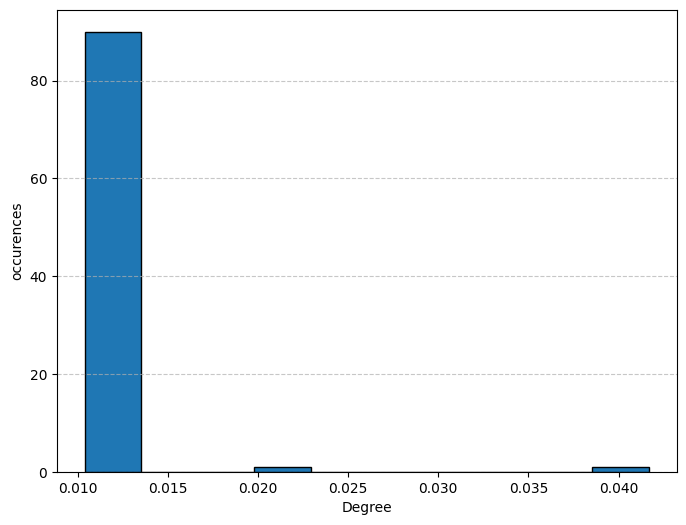

In [99]:
probabilities = list(degree_distribution.values())

# Plot the degree distribution
plt.figure(figsize=(8, 6))
plt.hist(probabilities, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('occurences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
temporal_paths = pp.MultiOrderModel.from_temporal_graph(graph, delta=1800, max_order=4)

100%|██████████| 33452/33452 [14:15<00:00, 39.12it/s]


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 5644629656 bytes.

In [ ]:
import pandas as pd
from collections import defaultdict, deque

  # Replace with actual logic if available, or use a constant timestamp

# Rename the columns to make them more readable
df.columns = ['source', 'destination', 'timestamp']
# Clean the data: Drop rows with missing values
df_cleaned = df[['source', 'destination', 'timestamp']]  # Select relevant columns
df_cleaned.dropna(inplace=True)  # Drop rows with missing values

# Convert cleaned DataFrame to list of tuples (source, destination, timestamp)
data_tuples = list(df_cleaned.itertuples(index=False, name=None))

In [ ]:
# Define the PaCo algorithm
def paco(data, delta, max_length):
    """
    Implements the PaCo algorithm for counting causal paths in temporal networks.
    
    Args:
    - data: List of tuples (source, destination, timestamp).
    - delta: Maximum time difference between consecutive links.
    - max_length: Maximum path length (K).
    
    Returns:
    - path_counts: Dictionary of causal paths and their counts.
    """
    # Sort data by timestamp
    data = sorted(data, key=lambda x: x[2])
    
    # Initialize sliding window and path counters
    window = deque()  # Sliding window
    path_counts = defaultdict(int)  # Overall causal path counts
    
    # Iterate through each link in the data
    for (s, d, t) in data:
        current_counts = defaultdict(int)  # Local counts for current link
        current_counts[(s, d)] = 1  # A single link is a causal path of length 1
        
        # Update the sliding window: remove outdated links
        while window and window[0][2] < t - delta:
            window.popleft()
        
        # Extend paths from the sliding window
        for (prev_s, prev_d, prev_t, prev_counts) in window:
            if prev_d == s and prev_t < t:  # Valid path extension
                for path, count in prev_counts.items():
                    if len(path) < max_length:  # Enforce maximum path length
                        extended_path = path + (d,)
                        current_counts[extended_path] += count
        
        # Update global counts
        for path, count in current_counts.items():
            path_counts[path] += count
        
        # Add current link and its paths to the sliding window
        window.append((s, d, t, current_counts))
    
    return path_counts

# Parameters
delta = 1800  # Example: maximum time difference
max_length = 4  # Maximum path length

# Run the algorithm with the cleaned data
results = paco(data_tuples, delta, max_length)

# Output the results
for path, count in results.items():
    print(f"Path: {path}, Count: {count}")

Path: (1, 2), Count: 5753
Path: (3, 4), Count: 22194
Path: (5, 6), Count: 3652
Path: (7, 8), Count: 79
Path: (9, 2), Count: 1778
Path: (10, 8), Count: 18883
Path: (11, 12), Count: 13514
Path: (13, 6), Count: 4911
Path: (14, 15), Count: 8184
Path: (7, 16), Count: 8
Path: (7, 17), Count: 8
Path: (7, 18), Count: 60
Path: (7, 19), Count: 47
Path: (7, 20), Count: 2
Path: (21, 16), Count: 4
Path: (21, 18), Count: 3
Path: (21, 22), Count: 3
Path: (21, 23), Count: 3
Path: (21, 8), Count: 159
Path: (10, 23), Count: 364
Path: (17, 18), Count: 38
Path: (17, 24), Count: 1066
Path: (17, 19), Count: 9
Path: (17, 20), Count: 18
Path: (25, 17), Count: 6
Path: (25, 22), Count: 1
Path: (25, 19), Count: 2361
Path: (25, 23), Count: 89
Path: (25, 8), Count: 236
Path: (23, 26), Count: 33
Path: (23, 20), Count: 8
Path: (27, 23), Count: 8
Path: (27, 26), Count: 6
Path: (27, 20), Count: 9
Path: (7, 23), Count: 15
Path: (28, 29), Count: 54
Path: (28, 21), Count: 6
Path: (28, 30), Count: 5
Path: (28, 31), Count: